In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/pakistan_temps.csv')
df["date"] = pd.to_datetime(
    df[" Year"].astype(str) + " " + df["Month"] + " 15",
    format="%Y %B %d"
)
df.index = df["date"]
df = df.rename(columns={"Temperature - (Celsius)" : "temp"})
df = df[["temp"]]
df

,temp
date,
1901-01-15,7.72768
1901-02-15,8.93600
1901-03-15,16.96320
1901-04-15,21.27410
1901-05-15,26.04970
...,...
2016-08-15,27.63320
2016-09-15,26.71790
2016-10-15,22.39820


<Axes: xlabel='date'>

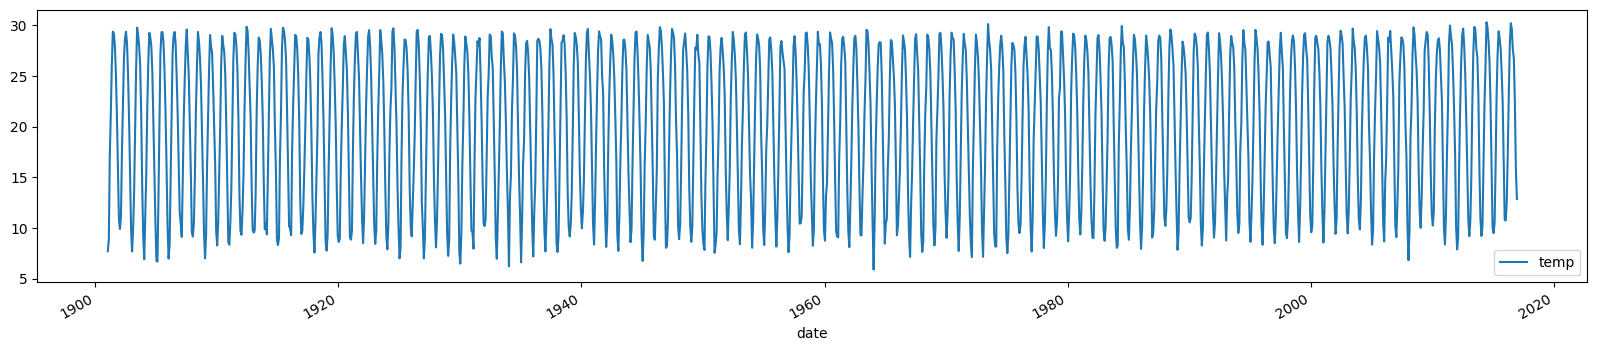

In [3]:
df.plot(figsize=(20, 4))

In [4]:
time = list(range(len(df)))
df["time"] = time

In [5]:
df

,temp,time
date,,
1901-01-15,7.72768,0
1901-02-15,8.93600,1
1901-03-15,16.96320,2
1901-04-15,21.27410,3
1901-05-15,26.04970,4
...,...,...
2016-08-15,27.63320,1387
2016-09-15,26.71790,1388
2016-10-15,22.39820,1389


In [6]:
df.to_csv("../data/pakistan_temps_w_time.csv")

<Axes: xlabel='date'>

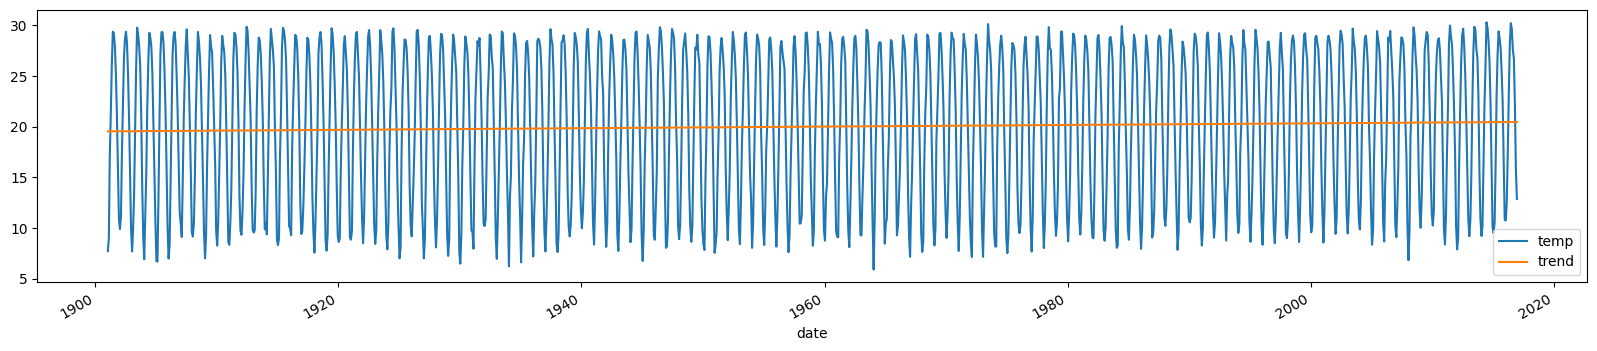

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[["time"]], df["temp"])
preds = model.predict(df[["time"]])
df["trend"] = preds
df.drop(columns="time").plot(figsize=(20, 4))

In [8]:
print(float(model.coef_[0]))

0.0006665507231542902


In [9]:
df

,temp,time,trend
date,,,
1901-01-15,7.72768,0,19.543543
1901-02-15,8.93600,1,19.544210
1901-03-15,16.96320,2,19.544877
1901-04-15,21.27410,3,19.545543
1901-05-15,26.04970,4,19.546210
...,...,...,...
2016-08-15,27.63320,1387,20.468049
2016-09-15,26.71790,1388,20.468716
2016-10-15,22.39820,1389,20.469382


In [10]:
df.to_csv("../data/pakistan_temps_w_trend.csv")